In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt

# Data Importing/Formatting

In [2]:
# read in squirrel data
df = pd.read_csv('./squirrel_census.csv')
df.head(3)

,long,lat,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,age,primary_fur_color,highlight_fur_color,...,approaches,indifferent,runs_from,other_interactions,lat_long,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086),NaN,19,4,19,13
1,-73.957044,40.794851,37E-PM-1006-03,37E,PM,10062018,3,Adult,Gray,Cinnamon,...,False,False,True,me,POINT (-73.9570437717691 40.794850940803904),NaN,19,4,19,13
2,-73.976831,40.766718,2E-AM-1010-03,02E,AM,10102018,3,Adult,Cinnamon,NaN,...,False,True,False,NaN,POINT (-73.9768311751004 40.76671780725581),NaN,19,4,19,13


In [3]:
# Get rid of unnecessary features
df = df.drop(['lat_long',
              'highlight_fur_color',
              'combination_of_primary_and_highlight_color',
              'color_notes',
              'specific_location',
              'above_ground_sighter_measurement',
              'other_activities',
              'other_interactions',
              'zip_codes',
              'community_districts',
              'borough_boundaries',
              'city_council_districts',
              'police_precincts'], axis=1)
# Changes 'False' and 'True' to 0 and 1,respectively
df = (df * 1)

print('Shape: ',df.shape)
df.head()

Shape:  (3023, 23)


,long,lat,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,age,primary_fur_color,location,...,eating,foraging,kuks,quaas,moans,tail_flags,tail_twitches,approaches,indifferent,runs_from
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,-73.957044,40.794851,37E-PM-1006-03,37E,PM,10062018,3,Adult,Gray,Ground Plane,...,0,0,0,0,0,0,0,0,0,1
2,-73.976831,40.766718,2E-AM-1010-03,02E,AM,10102018,3,Adult,Cinnamon,Above Ground,...,0,0,0,0,0,0,0,0,1,0
3,-73.975725,40.769703,5D-PM-1018-05,05D,PM,10182018,5,Juvenile,Gray,Above Ground,...,0,0,0,0,0,0,0,0,0,1
4,-73.959313,40.797533,39B-AM-1018-01,39B,AM,10182018,1,NaN,NaN,Above Ground,...,0,0,1,0,0,0,0,0,0,0


In [4]:
# change data to category
for feat in ['unique_squirrel_id', 'hectare', 'shift', 'age', 'primary_fur_color', 'location']:
    df[feat] = df[feat].astype('category')

df.dtypes

long                        float64
lat                         float64
unique_squirrel_id         category
hectare                    category
shift                      category
date                          int64
hectare_squirrel_number       int64
age                        category
primary_fur_color          category
location                   category
running                       int64
chasing                       int64
climbing                      int64
eating                        int64
foraging                      int64
kuks                          int64
quaas                         int64
moans                         int64
tail_flags                    int64
tail_twitches                 int64
approaches                    int64
indifferent                   int64
runs_from                     int64
dtype: object

In [5]:
# Convert squirrel ID to integer
df.unique_squirrel_id = pd.Categorical(df.unique_squirrel_id)
df.unique_squirrel_id = df.unique_squirrel_id.cat.codes

df.head()

,long,lat,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,age,primary_fur_color,location,...,eating,foraging,kuks,quaas,moans,tail_flags,tail_twitches,approaches,indifferent,runs_from
0,-73.956134,40.794082,1912,37F,PM,10142018,3,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,-73.957044,40.794851,1902,37E,PM,10062018,3,Adult,Gray,Ground Plane,...,0,0,0,0,0,0,0,0,0,1
2,-73.976831,40.766718,1297,02E,AM,10102018,3,Adult,Cinnamon,Above Ground,...,0,0,0,0,0,0,0,0,1,0
3,-73.975725,40.769703,2565,05D,PM,10182018,5,Juvenile,Gray,Above Ground,...,0,0,0,0,0,0,0,0,0,1
4,-73.959313,40.797533,2045,39B,AM,10182018,1,NaN,NaN,Above Ground,...,0,0,1,0,0,0,0,0,0,0


In [6]:
df.location.value_counts()

Ground Plane    2116
Above Ground     843
Name: location, dtype: int64

In [7]:
# read in image for plot
img = plt.imread('map.png')

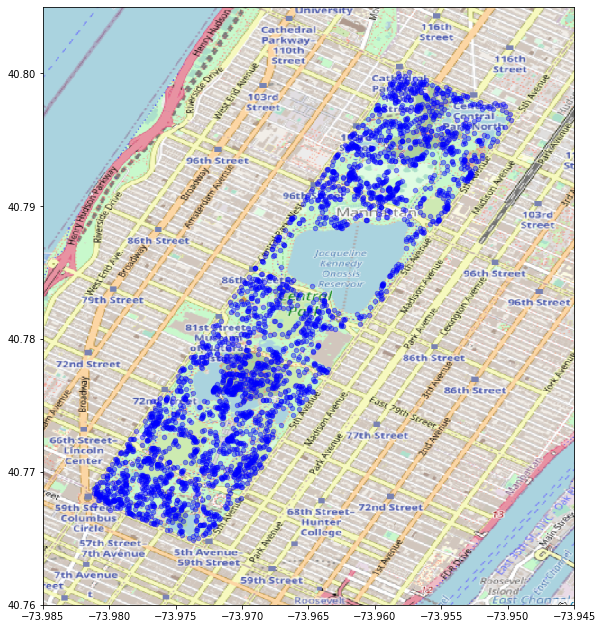

In [8]:
# plot scatter on map
fig, ax = plt.subplots(figsize = (12,11))
ax.scatter(df.long, df.lat, zorder=1, alpha= 0.4, c='b', s=20)

BBox = (-73.985,-73.945,      
        40.760,40.805)

ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

ax.imshow(img, zorder=0, extent = BBox, aspect= 'equal')

In [9]:
# tail_flags are a sign of aggression/frustration, not friendly
# tail_twitch are used for many different things, not helpful target
# approaches could be a sign of curiosity or friendliness, will be used as friendly
# indifferent could be caution or curiosity, neither friendly nor not friendly (no effect)
# runs_from clearly a sign of not friendly

# friendly squirrels will be defined by squirrels that approaches
# not friendly squirrels will be defined by squirrels that run_from, indifferent and/or tail_flag

# ---Sources---
# https://slate.com/technology/2016/05/squirrels-express-frustration-by-twitching-their-tails-researchers-say.html
# https://www.wired.com/2014/06/squirrel-alarm-calls-are-surprisingly-complex/

df['friendliness'] = df['approaches'] - df['tail_flags'] - df['runs_from'] 
df.friendliness.value_counts()

 0    2116
-1     709
 1     150
-2      48
Name: friendliness, dtype: int64

In [10]:
# assign negative numbers to not friendly, 0 to indifferent, positive numbers to friendly
df.loc[df.friendliness == -1, 'friendliness'] = 'not friendly'
df.loc[df.friendliness == -2, 'friendliness'] = 'not friendly'
df.loc[df.friendliness == 0, 'friendliness'] = 'indifferent'
df.loc[df.friendliness == 1, 'friendliness'] = 'friendly'
df.friendliness

0        indifferent
1       not friendly
2        indifferent
3       not friendly
4        indifferent
            ...     
3018    not friendly
3019     indifferent
3020     indifferent
3021     indifferent
3022        friendly
Name: friendliness, Length: 3023, dtype: object

In [11]:
# display counts of each friendliness
df.friendliness.value_counts()

indifferent     2116
not friendly     757
friendly         150
Name: friendliness, dtype: int64

# Baseline Classifier Guessing Indifferent

In [12]:
# display counts of each friendliness
df.friendliness.value_counts()

indifferent     2116
not friendly     757
friendly         150
Name: friendliness, dtype: int64

In [13]:
# guessing that all squirrels are indifferent as they are majority and calculating error
indifferent_squirrel_count = df.friendliness.value_counts()['indifferent']
total_squirrels = df.friendliness.value_counts().sum()

accuracy = indifferent_squirrel_count/total_squirrels
print('baseline accuracy rate = ',accuracy.round(2))

baseline accuracy rate =  0.7


# Logistic Regressor Test

In [14]:
# test train split
(df_train,df_test) = train_test_split(df,train_size=0.8,test_size=0.2,random_state=0)

In [15]:
# split features and target and then standarize
features_train = df_train.drop(['friendliness','indifferent','approaches','tail_flags','date','runs_from','unique_squirrel_id'],axis=1)
features_test = df_test.drop(['friendliness','indifferent','approaches','tail_flags','date','runs_from','unique_squirrel_id'],axis=1)

target_train = df_train.friendliness
target_test = df_test.friendliness

features_train = pd.get_dummies(features_train)
features_test = pd.get_dummies(features_test)

features_train = (features_train - features_train.mean()) / features_train.std()
features_test = (features_test - features_test.mean()) / features_test.std()

In [16]:
# change NaN to a bias (in the grand scheme of things this won't matter, its one/two entries in 3000)
for feature in features_train.columns[features_train.isna().any()].tolist():
    features_train[feature] = 1
    
for feature in features_test.columns[features_test.isna().any()].tolist():
    features_test[feature] = 1

In [17]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(features_train,target_train)
accuracy = lr.score(features_test,target_test)
print('test accuracy rate = ',accuracy.round(2))

test accuracy rate =  0.68


# Decision Tree Test

In [19]:
# change NaN to a bias (in the grand scheme of things this won't matter, its one/two entries in 3000)
for feature in features.columns[features.isna().any()].tolist():
    features[feature] = 1

In [20]:
grid = {'max_depth':np.arange(1,20)}

tree = DecisionTreeClassifier()
treeCV = GridSearchCV(tree,param_grid=grid,return_train_score=True)

In [21]:
treeCV.fit(features,target)
print('best tree depth',treeCV.best_params_)
print('best test accuracy rate',treeCV.best_score_.round(2))

best tree depth {'max_depth': 6}
best test accuracy rate 0.7


# Random Forest Test

In [22]:
# Random forests grid search cross validation
# NOTE: This takes around 2-4 minutes to compute
rfgrid = {'max_depth':np.arange(1,30),'n_estimators':[500,1000,1500]}

rf = RandomForestClassifier()
rfCV = GridSearchCV(rf,param_grid=rfgrid,n_jobs=-1)
rfCV.fit(features,target)
print('optimal parameters',rfCV.best_params_)
print('optimal accuracy rate',rfCV.best_score_.round(2))

optimal parameters {'max_depth': 29, 'n_estimators': 500}
optimal accuracy rate 0.72


# KNN Classifier Test

In [23]:
knngrid = {'n_neighbors':np.arange(1,200)}

knn = KNeighborsClassifier()
knnCV = GridSearchCV(knn,param_grid=knngrid,n_jobs=-1)
knnCV.fit(features,target)
print('optimal parameters',knnCV.best_params_)
print('optimal accuracy rate',knnCV.best_score_.round(2))

optimal parameters {'n_neighbors': 28}
optimal accuracy rate 0.71


# Gradient Boosting Test

In [24]:
# Originally when tried, the method took to long to compute due to the sheer number of features that we have.
# Random Forests also takes quite a long time to compute

# Final Algorithm

In [25]:
rf = RandomForestClassifier(max_depth=29,
                            n_estimators=500)
rf.fit(features_train,target_train)
print('accuracy rate',rf.score(features_test,target_test).round(4))

accuracy rate 0.73


In [26]:
feature_importances = pd.Series(rf.feature_importances_,index=features_train.columns)
feature_importances.sort_values(ascending=False)

lat                        0.115158
long                       0.113829
hectare_squirrel_number    0.078703
running                    0.030695
foraging                   0.021404
                             ...   
hectare_41F                0.000000
hectare_42B                0.000000
hectare_13I                0.000000
hectare_23E                0.000000
hectare_05H                0.000000
Length: 361, dtype: float64